/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_88142/3201561947.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0, 0] = 4 * x[0] + x[1] - 1
/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_88142/3201561947.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1, 0] = 3 * x[1] + x[0] - 2
/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_88142/3201561947.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_errors.appen

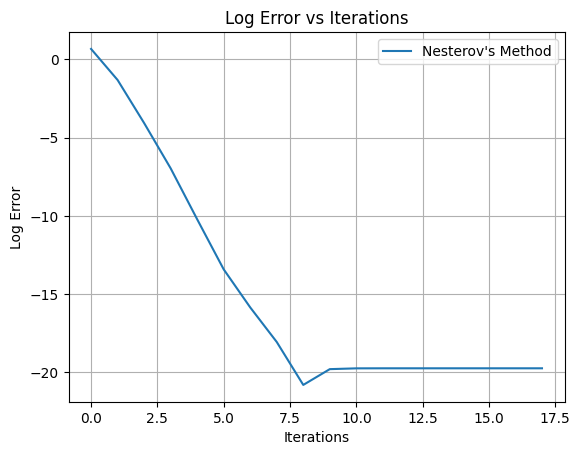

Final minimizer (x): [[0.09090909]
 [0.63636364]]
Final minimum value of q2: [-0.68181818]
Total iterations: 18


In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Define the function q2(x)
def evaluate_q2(x):
    return 2 * x[0]**2 + x[0] * x[1] + 1.5 * x[1]**2 - x[0] - 2 * x[1]

# Define the gradient of q2(x)
def compute_gradient_q2(x):
    grad = np.zeros((2, 1))
    grad[0, 0] = 4 * x[0] + x[1] - 1
    grad[1, 0] = 3 * x[1] + x[0] - 2
    return grad

# Compute the step size α
def compute_step_size_q2():
    return 2 / (7 + m.sqrt(5))

# Compute the momentum coefficient β
def compute_momentum_coefficient_q2():
    u0 = (7 + m.sqrt(5)) / (7 - m.sqrt(5))
    return (m.sqrt(u0) - 1) / (m.sqrt(u0) + 1)

# Compute the norm of a vector
def compute_norm(vector):
    return np.linalg.norm(vector)

# Implement Nesterov's Accelerated Gradient Descent for q2(x)
def nesterov_method_q2(initial_x, tolerance, alpha, beta):
    x_prev = initial_x
    x_current = initial_x
    iterations = 0
    log_errors = []
    iter_counts = []

    # Optimal theoretical value of q2
    q2_optimal = -0.68181818

    while compute_norm(compute_gradient_q2(x_current)) > tolerance:
        # Compute the gradient at the lookahead point
        lookahead_grad = compute_gradient_q2(x_current + beta * (x_current - x_prev))

        # Save the current value of x
        temp_x = x_current.copy()

        # Update x_current using Nesterov's formula
        x_current -= alpha * lookahead_grad
        x_current += beta * (x_current - x_prev)

        # Update x_prev
        x_prev = temp_x

        # Compute relative error and log it
        relative_error = abs((evaluate_q2(x_current) - q2_optimal) / q2_optimal)
        log_errors.append(m.log(relative_error))
        iter_counts.append(iterations)

        # Increment the iteration counter
        iterations += 1

    # Plot log error vs iterations
    plt.plot(iter_counts, log_errors, label="Nesterov's Method")
    plt.xlabel('Iterations')
    plt.ylabel('Log Error')
    plt.title('Log Error vs Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    return x_current, evaluate_q2(x_current), iterations

# Parameters
step_size_alpha = compute_step_size_q2()
momentum_beta = compute_momentum_coefficient_q2()
tolerance_limit = 1e-9
x_initial = np.array([[3], [5]], dtype=float)  # Explicitly set dtype to float

# Run Nesterov's method for q2(x)
final_x, final_q2_value, total_iterations = nesterov_method_q2(x_initial, tolerance_limit, step_size_alpha, momentum_beta)

# Results
print("Final minimizer (x):", final_x)
print("Final minimum value of q2:", final_q2_value)
print("Total iterations:", total_iterations)